In [3]:
import random
import numpy as np
import zstandard
import networkx as nx
import copy
import osmnx as ox

from collections import defaultdict
import matplotlib.pyplot as plt
import os
import subprocess
import ast

from contextlib import contextmanager
import sys
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import functools
import tracemalloc
import psutil
import pandas as pd


In [4]:
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

import utils as ut

In [205]:
def measure_resources(func):
    """Decorator to measure and execution time of a function and save to a CSV file"""
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        process = psutil.Process()
        
        start_time = time.time()

        result = func(*args, **kwargs)  # Execute the function

        end_time = time.time()
 
        
        duration = end_time - start_time

        
        sp_length = nx.shortest_path_length(g, orig_node, dest_node, weight=wgt,method='dijkstra')
        
        # Create resource usage data
        resource_usage = {
            "Function": func.__name__,
            "Dataset": place,
            "Shortest Path length": sp_length,
            "DAG nodes": dag_nodes,
            "Execution Time (s)": duration,
            "Timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
        }

        # Save results to a Pandas DataFrame
        csv_filename = "resource_usage_kyoto_dag.csv"
        df = pd.DataFrame([resource_usage])

        # Append to CSV file (create if not exists)
        if not os.path.exists(csv_filename):
            df.to_csv(csv_filename, index=False)
        else:
            df.to_csv(csv_filename, mode='a', index=False, header=False)

        print(f"Resource Usage for {func.__name__}:")
        print(df)

        return result

    return wrapper


@measure_resources
def get_dag_wrapper(g, orig_node, dest_node, wgt):
    return ut.get_dag(g, orig_node, dest_node, weight=wgt)

@measure_resources
def solve_and_compute(dag, orig_node, dest_node):
    K, alpha, model, result = ut.iterative_solver(dag, orig_node, dest_node)
    final = ut.compute_probabilities_and_expectations(dag, result, dest_node)
    return K, alpha, model, result, final

@measure_resources
def sample_paths(dag, orig_node, dest_node,  n_paths):
    return ut.sample_k_random_FP(dag, orig_node, dest_node,  n_paths)


In [206]:
place = 'Kyoto, Japan' #or 'Kyoto'
g = ut.get_nx_from_ox(place)
st_pairs = 100
st = ut.sample_st(g,st_pairs, seed = 118)
wgt = 'length'


for orig_node, dest_node in tqdm(zip(st[0], st[1]), total=len(st[0]), desc="Processing pairs of nodes"):
    
    dag = ut.get_dag(g, orig_node, dest_node, wgt)
    dag_nodes = len(dag.nodes())
    
    dag = get_dag_wrapper(g, orig_node, dest_node, wgt)
    K, alpha, model, result, final = solve_and_compute(dag, orig_node, dest_node)
    dag = final['dag']
    sample_paths(dag, orig_node, dest_node,  100)

Processing pairs of nodes:   0%|                          | 0/100 [00:00<?, ?it/s]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             11199.481        402   

   Execution Time (s)            Timestamp  
0            1.680836  2025-02-17 15:55:16  


Processing pairs of nodes:   1%|▏                 | 1/100 [00:07<12:31,  7.59s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             11199.481        402   

   Execution Time (s)            Timestamp  
0            3.663659  2025-02-17 15:55:20  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             11199.481        402   

   Execution Time (s)            Timestamp  
0            0.019318  2025-02-17 15:55:20  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             15445.488       2465   

   Execution Time (s)            Timestamp  
0            1.686205  2025-02-17 15:55:24  


Processing pairs of nodes:   2%|▎               | 2/100 [02:16<2:08:56, 78.95s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             15445.488       2465   

   Execution Time (s)            Timestamp  
0          125.234836  2025-02-17 15:57:29  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             15445.488       2465   

   Execution Time (s)            Timestamp  
0            0.023513  2025-02-17 15:57:29  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              4429.031        866   

   Execution Time (s)            Timestamp  
0            1.377797  2025-02-17 15:57:32  


Processing pairs of nodes:   3%|▍               | 3/100 [02:35<1:23:12, 51.47s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              4429.031        866   

   Execution Time (s)            Timestamp  
0           15.651824  2025-02-17 15:57:48  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              4429.031        866   

   Execution Time (s)            Timestamp  
0            0.009253  2025-02-17 15:57:48  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5247.359        163   

   Execution Time (s)            Timestamp  
0            1.634745  2025-02-17 15:57:51  


Processing pairs of nodes:   4%|▋                 | 4/100 [02:39<52:14, 32.65s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5247.359        163   

   Execution Time (s)            Timestamp  
0            0.646444  2025-02-17 15:57:52  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5247.359        163   

   Execution Time (s)            Timestamp  
0            0.009792  2025-02-17 15:57:52  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8865.558        467   

   Execution Time (s)            Timestamp  
0            1.414192  2025-02-17 15:57:55  


Processing pairs of nodes:   5%|▉                 | 5/100 [02:47<37:38, 23.78s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8865.558        467   

   Execution Time (s)            Timestamp  
0            4.688908  2025-02-17 15:58:00  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8865.558        467   

   Execution Time (s)            Timestamp  
0            0.016614  2025-02-17 15:58:00  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              2425.231        162   

   Execution Time (s)            Timestamp  
0            1.652531  2025-02-17 15:58:03  


Processing pairs of nodes:   6%|█                 | 6/100 [02:50<26:38, 17.01s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              2425.231        162   

   Execution Time (s)            Timestamp  
0            0.522111  2025-02-17 15:58:03  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              2425.231        162   

   Execution Time (s)            Timestamp  
0            0.005499  2025-02-17 15:58:03  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             18053.988        404   

   Execution Time (s)            Timestamp  
0            1.628057  2025-02-17 15:58:07  


Processing pairs of nodes:   7%|█▎                | 7/100 [02:58<21:22, 13.79s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             18053.988        404   

   Execution Time (s)            Timestamp  
0            3.913727  2025-02-17 15:58:11  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             18053.988        404   

   Execution Time (s)            Timestamp  
0             0.02189  2025-02-17 15:58:11  


Processing pairs of nodes:   8%|█▍                | 8/100 [03:01<15:52, 10.36s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               238.825          3   

   Execution Time (s)            Timestamp  
0            1.625687  2025-02-17 15:58:14  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               238.825          3   

   Execution Time (s)            Timestamp  
0            0.001062  2025-02-17 15:58:14  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               238.825          3   

   Execution Time (s)            Timestamp  
0            0.000213  2025-02-17 15:58:14  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              4760.725        200   

   Execution Time (s)            

Processing pairs of nodes:   9%|█▌                | 9/100 [03:05<12:37,  8.33s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              4760.725        200   

   Execution Time (s)            Timestamp  
0            0.788488  2025-02-17 15:58:17  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              4760.725        200   

   Execution Time (s)            Timestamp  
0            0.006116  2025-02-17 15:58:18  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             32083.903        826   

   Execution Time (s)            Timestamp  
0            1.676515  2025-02-17 15:58:21  


Processing pairs of nodes:  10%|█▋               | 10/100 [03:25<18:10, 12.12s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             32083.903        826   

   Execution Time (s)            Timestamp  
0           17.086377  2025-02-17 15:58:38  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             32083.903        826   

   Execution Time (s)            Timestamp  
0            0.025418  2025-02-17 15:58:38  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13314.237       1177   

   Execution Time (s)            Timestamp  
0            1.343587  2025-02-17 15:58:41  


Processing pairs of nodes:  11%|█▊               | 11/100 [03:55<26:11, 17.66s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13314.237       1177   

   Execution Time (s)            Timestamp  
0             26.9556  2025-02-17 15:59:08  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13314.237       1177   

   Execution Time (s)            Timestamp  
0            0.020153  2025-02-17 15:59:08  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              6848.957        393   

   Execution Time (s)            Timestamp  
0            1.667485  2025-02-17 15:59:11  


Processing pairs of nodes:  12%|██               | 12/100 [04:01<20:42, 14.12s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              6848.957        393   

   Execution Time (s)            Timestamp  
0            2.939705  2025-02-17 15:59:14  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              6848.957        393   

   Execution Time (s)            Timestamp  
0            0.010433  2025-02-17 15:59:14  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             14460.279        976   

   Execution Time (s)            Timestamp  
0            1.666135  2025-02-17 15:59:18  


Processing pairs of nodes:  13%|██▏              | 13/100 [04:25<24:33, 16.94s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             14460.279        976   

   Execution Time (s)            Timestamp  
0           19.832127  2025-02-17 15:59:38  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             14460.279        976   

   Execution Time (s)            Timestamp  
0            0.022151  2025-02-17 15:59:38  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             16862.284       1507   

   Execution Time (s)            Timestamp  
0            1.375176  2025-02-17 15:59:41  


Processing pairs of nodes:  14%|██▍              | 14/100 [05:19<40:30, 28.27s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             16862.284       1507   

   Execution Time (s)            Timestamp  
0           51.048906  2025-02-17 16:00:32  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             16862.284       1507   

   Execution Time (s)            Timestamp  
0            0.028085  2025-02-17 16:00:32  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             11318.686        389   

   Execution Time (s)            Timestamp  
0            1.376479  2025-02-17 16:00:35  


Processing pairs of nodes:  15%|██▌              | 15/100 [05:26<30:50, 21.77s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             11318.686        389   

   Execution Time (s)            Timestamp  
0            3.458398  2025-02-17 16:00:39  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             11318.686        389   

   Execution Time (s)            Timestamp  
0            0.015193  2025-02-17 16:00:39  


Processing pairs of nodes:  16%|██▋              | 16/100 [05:29<22:38, 16.17s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              1757.917         49   

   Execution Time (s)            Timestamp  
0            1.726285  2025-02-17 16:00:42  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              1757.917         49   

   Execution Time (s)            Timestamp  
0            0.060425  2025-02-17 16:00:42  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              1757.917         49   

   Execution Time (s)            Timestamp  
0            0.002131  2025-02-17 16:00:42  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13948.409       1093   

   Execution Time (s)            

Processing pairs of nodes:  17%|██▉              | 17/100 [05:56<26:53, 19.43s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13948.409       1093   

   Execution Time (s)            Timestamp  
0           23.818878  2025-02-17 16:01:09  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13948.409       1093   

   Execution Time (s)            Timestamp  
0            0.022936  2025-02-17 16:01:09  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              4824.017        527   

   Execution Time (s)            Timestamp  
0            1.694083  2025-02-17 16:01:12  


Processing pairs of nodes:  18%|███              | 18/100 [06:05<22:14, 16.27s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              4824.017        527   

   Execution Time (s)            Timestamp  
0            5.778646  2025-02-17 16:01:18  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              4824.017        527   

   Execution Time (s)            Timestamp  
0            0.010612  2025-02-17 16:01:18  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5403.047        113   

   Execution Time (s)            Timestamp  
0            1.956975  2025-02-17 16:01:22  


Processing pairs of nodes:  19%|███▏             | 19/100 [06:09<17:07, 12.69s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5403.047        113   

   Execution Time (s)            Timestamp  
0            0.377876  2025-02-17 16:01:22  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5403.047        113   

   Execution Time (s)            Timestamp  
0            0.007223  2025-02-17 16:01:22  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan                4623.0        299   

   Execution Time (s)            Timestamp  
0             1.79635  2025-02-17 16:01:26  


Processing pairs of nodes:  20%|███▍             | 20/100 [06:15<13:58, 10.48s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan                4623.0        299   

   Execution Time (s)            Timestamp  
0            1.858744  2025-02-17 16:01:28  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan                4623.0        299   

   Execution Time (s)            Timestamp  
0            0.009844  2025-02-17 16:01:28  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              3052.326        101   

   Execution Time (s)            Timestamp  
0            1.688035  2025-02-17 16:01:31  


Processing pairs of nodes:  21%|███▌             | 21/100 [06:18<11:02,  8.39s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              3052.326        101   

   Execution Time (s)            Timestamp  
0            0.237589  2025-02-17 16:01:31  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              3052.326        101   

   Execution Time (s)            Timestamp  
0            0.005481  2025-02-17 16:01:31  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               2925.62        227   

   Execution Time (s)            Timestamp  
0            1.673818  2025-02-17 16:01:35  


Processing pairs of nodes:  22%|███▋             | 22/100 [06:23<09:23,  7.22s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               2925.62        227   

   Execution Time (s)            Timestamp  
0            1.041707  2025-02-17 16:01:36  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               2925.62        227   

   Execution Time (s)            Timestamp  
0            0.006834  2025-02-17 16:01:36  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             14436.937        741   

   Execution Time (s)            Timestamp  
0            1.640037  2025-02-17 16:01:39  


Processing pairs of nodes:  23%|███▉             | 23/100 [06:37<12:07,  9.44s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             14436.937        741   

   Execution Time (s)            Timestamp  
0           11.415101  2025-02-17 16:01:50  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             14436.937        741   

   Execution Time (s)            Timestamp  
0            0.023477  2025-02-17 16:01:50  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              6529.229        711   

   Execution Time (s)            Timestamp  
0            1.331881  2025-02-17 16:01:53  


Processing pairs of nodes:  24%|████             | 24/100 [06:50<13:12, 10.43s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              6529.229        711   

   Execution Time (s)            Timestamp  
0            9.638779  2025-02-17 16:02:03  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              6529.229        711   

   Execution Time (s)            Timestamp  
0             0.01303  2025-02-17 16:02:03  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9312.012        645   

   Execution Time (s)            Timestamp  
0            1.643509  2025-02-17 16:02:06  


Processing pairs of nodes:  25%|████▎            | 25/100 [07:02<13:38, 10.91s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9312.012        645   

   Execution Time (s)            Timestamp  
0            8.860917  2025-02-17 16:02:15  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9312.012        645   

   Execution Time (s)            Timestamp  
0            0.015792  2025-02-17 16:02:15  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13167.436       1435   

   Execution Time (s)            Timestamp  
0            1.331396  2025-02-17 16:02:18  


Processing pairs of nodes:  26%|████▍            | 26/100 [07:51<27:36, 22.38s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13167.436       1435   

   Execution Time (s)            Timestamp  
0           45.848755  2025-02-17 16:03:04  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13167.436       1435   

   Execution Time (s)            Timestamp  
0            0.021971  2025-02-17 16:03:04  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               8845.67        286   

   Execution Time (s)            Timestamp  
0            1.637143  2025-02-17 16:03:07  


Processing pairs of nodes:  27%|████▌            | 27/100 [07:56<20:57, 17.23s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               8845.67        286   

   Execution Time (s)            Timestamp  
0            1.984033  2025-02-17 16:03:09  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               8845.67        286   

   Execution Time (s)            Timestamp  
0             0.01904  2025-02-17 16:03:09  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8127.187        610   

   Execution Time (s)            Timestamp  
0            1.659852  2025-02-17 16:03:13  


Processing pairs of nodes:  28%|████▊            | 28/100 [08:08<18:34, 15.48s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8127.187        610   

   Execution Time (s)            Timestamp  
0             7.89502  2025-02-17 16:03:21  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8127.187        610   

   Execution Time (s)            Timestamp  
0            0.014489  2025-02-17 16:03:21  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13209.474       2380   

   Execution Time (s)            Timestamp  
0            1.384586  2025-02-17 16:03:24  


Processing pairs of nodes:  29%|████▉            | 29/100 [10:13<57:07, 48.28s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13209.474       2380   

   Execution Time (s)            Timestamp  
0          121.524904  2025-02-17 16:05:26  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13209.474       2380   

   Execution Time (s)            Timestamp  
0             0.03075  2025-02-17 16:05:26  


Processing pairs of nodes:  30%|█████            | 30/100 [10:16<40:33, 34.77s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               980.947         46   

   Execution Time (s)            Timestamp  
0            1.715466  2025-02-17 16:05:29  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               980.947         46   

   Execution Time (s)            Timestamp  
0            0.046297  2025-02-17 16:05:29  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               980.947         46   

   Execution Time (s)            Timestamp  
0            0.001948  2025-02-17 16:05:29  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              3315.712        272   

   Execution Time (s)            

Processing pairs of nodes:  31%|█████▎           | 31/100 [10:21<29:41, 25.81s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              3315.712        272   

   Execution Time (s)            Timestamp  
0            1.715707  2025-02-17 16:05:34  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              3315.712        272   

   Execution Time (s)            Timestamp  
0            0.007064  2025-02-17 16:05:34  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              7873.289        783   

   Execution Time (s)            Timestamp  
0            1.959089  2025-02-17 16:05:38  


Processing pairs of nodes:  32%|█████▍           | 32/100 [10:37<25:55, 22.87s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              7873.289        783   

   Execution Time (s)            Timestamp  
0           11.949269  2025-02-17 16:05:50  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              7873.289        783   

   Execution Time (s)            Timestamp  
0            0.016712  2025-02-17 16:05:50  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13259.158        380   

   Execution Time (s)            Timestamp  
0            1.335501  2025-02-17 16:05:53  


Processing pairs of nodes:  33%|█████▌           | 33/100 [10:44<20:13, 18.11s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13259.158        380   

   Execution Time (s)            Timestamp  
0            3.765662  2025-02-17 16:05:57  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13259.158        380   

   Execution Time (s)            Timestamp  
0            0.023815  2025-02-17 16:05:57  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5515.705        148   

   Execution Time (s)            Timestamp  
0            1.372011  2025-02-17 16:06:00  


Processing pairs of nodes:  34%|█████▊           | 34/100 [10:48<15:11, 13.81s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5515.705        148   

   Execution Time (s)            Timestamp  
0            0.562501  2025-02-17 16:06:01  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5515.705        148   

   Execution Time (s)            Timestamp  
0            0.012416  2025-02-17 16:06:01  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              4872.841        444   

   Execution Time (s)            Timestamp  
0             1.35063  2025-02-17 16:06:04  


Processing pairs of nodes:  35%|█████▉           | 35/100 [10:55<12:43, 11.74s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              4872.841        444   

   Execution Time (s)            Timestamp  
0            3.716031  2025-02-17 16:06:08  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              4872.841        444   

   Execution Time (s)            Timestamp  
0            0.008675  2025-02-17 16:06:08  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9689.248        656   

   Execution Time (s)            Timestamp  
0            1.334983  2025-02-17 16:06:11  


Processing pairs of nodes:  36%|██████           | 36/100 [11:07<12:49, 12.02s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9689.248        656   

   Execution Time (s)            Timestamp  
0             9.55688  2025-02-17 16:06:20  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9689.248        656   

   Execution Time (s)            Timestamp  
0            0.017433  2025-02-17 16:06:20  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              2231.414        238   

   Execution Time (s)            Timestamp  
0            1.727673  2025-02-17 16:06:24  


Processing pairs of nodes:  37%|██████▎          | 37/100 [11:12<10:18,  9.81s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              2231.414        238   

   Execution Time (s)            Timestamp  
0            1.085447  2025-02-17 16:06:25  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              2231.414        238   

   Execution Time (s)            Timestamp  
0            0.005332  2025-02-17 16:06:25  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5358.438        912   

   Execution Time (s)            Timestamp  
0            1.700774  2025-02-17 16:06:28  


Processing pairs of nodes:  38%|██████▍          | 38/100 [11:31<12:52, 12.46s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5358.438        912   

   Execution Time (s)            Timestamp  
0           15.416088  2025-02-17 16:06:43  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5358.438        912   

   Execution Time (s)            Timestamp  
0            0.010137  2025-02-17 16:06:44  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             24380.185        153   

   Execution Time (s)            Timestamp  
0            1.364256  2025-02-17 16:06:47  


Processing pairs of nodes:  39%|██████▋          | 39/100 [11:35<10:09,  9.99s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             24380.185        153   

   Execution Time (s)            Timestamp  
0            0.894583  2025-02-17 16:06:48  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             24380.185        153   

   Execution Time (s)            Timestamp  
0            0.012002  2025-02-17 16:06:48  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             10577.998        791   

   Execution Time (s)            Timestamp  
0            1.662601  2025-02-17 16:06:51  


Processing pairs of nodes:  40%|██████▊          | 40/100 [11:53<12:26, 12.44s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             10577.998        791   

   Execution Time (s)            Timestamp  
0           14.994144  2025-02-17 16:07:06  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             10577.998        791   

   Execution Time (s)            Timestamp  
0            0.020054  2025-02-17 16:07:06  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9625.442        393   

   Execution Time (s)            Timestamp  
0            1.426627  2025-02-17 16:07:09  


Processing pairs of nodes:  41%|██████▉          | 41/100 [12:00<10:39, 10.84s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9625.442        393   

   Execution Time (s)            Timestamp  
0             3.49171  2025-02-17 16:07:13  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9625.442        393   

   Execution Time (s)            Timestamp  
0            0.013346  2025-02-17 16:07:13  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5795.165        180   

   Execution Time (s)            Timestamp  
0            1.678847  2025-02-17 16:07:16  


Processing pairs of nodes:  42%|███████▏         | 42/100 [12:04<08:26,  8.73s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5795.165        180   

   Execution Time (s)            Timestamp  
0            0.677302  2025-02-17 16:07:17  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5795.165        180   

   Execution Time (s)            Timestamp  
0             0.01942  2025-02-17 16:07:17  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             10836.406        932   

   Execution Time (s)            Timestamp  
0            1.838846  2025-02-17 16:07:21  


Processing pairs of nodes:  43%|███████▎         | 43/100 [12:28<12:43, 13.39s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             10836.406        932   

   Execution Time (s)            Timestamp  
0           20.397974  2025-02-17 16:07:41  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             10836.406        932   

   Execution Time (s)            Timestamp  
0            0.020504  2025-02-17 16:07:41  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             10650.737        843   

   Execution Time (s)            Timestamp  
0            1.384683  2025-02-17 16:07:44  


Processing pairs of nodes:  44%|███████▍         | 44/100 [12:45<13:36, 14.58s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             10650.737        843   

   Execution Time (s)            Timestamp  
0            14.05216  2025-02-17 16:07:58  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             10650.737        843   

   Execution Time (s)            Timestamp  
0            0.016683  2025-02-17 16:07:58  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             11227.628        542   

   Execution Time (s)            Timestamp  
0             1.65733  2025-02-17 16:08:02  


Processing pairs of nodes:  45%|███████▋         | 45/100 [12:55<12:03, 13.15s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             11227.628        542   

   Execution Time (s)            Timestamp  
0            6.367705  2025-02-17 16:08:08  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             11227.628        542   

   Execution Time (s)            Timestamp  
0            0.013529  2025-02-17 16:08:08  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              2890.499         83   

   Execution Time (s)            Timestamp  
0            1.391873  2025-02-17 16:08:11  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              2890.499         83   

   Execution Time (s)      

Processing pairs of nodes:  46%|███████▊         | 46/100 [12:59<09:10, 10.19s/it]

Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              2890.499         83   

   Execution Time (s)            Timestamp  
0            0.004876  2025-02-17 16:08:12  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              6743.983        466   

   Execution Time (s)            Timestamp  
0            1.713964  2025-02-17 16:08:15  


Processing pairs of nodes:  47%|███████▉         | 47/100 [13:06<08:10,  9.26s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              6743.983        466   

   Execution Time (s)            Timestamp  
0            3.621431  2025-02-17 16:08:19  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              6743.983        466   

   Execution Time (s)            Timestamp  
0            0.008849  2025-02-17 16:08:19  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              17346.23       1389   

   Execution Time (s)            Timestamp  
0            1.772622  2025-02-17 16:08:22  


Processing pairs of nodes:  48%|████████▏        | 48/100 [13:49<16:55, 19.52s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              17346.23       1389   

   Execution Time (s)            Timestamp  
0           39.875269  2025-02-17 16:09:02  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              17346.23       1389   

   Execution Time (s)            Timestamp  
0            0.020653  2025-02-17 16:09:02  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13257.669       1147   

   Execution Time (s)            Timestamp  
0             1.66659  2025-02-17 16:09:05  


Processing pairs of nodes:  49%|████████▎        | 49/100 [14:20<19:22, 22.80s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13257.669       1147   

   Execution Time (s)            Timestamp  
0           26.954255  2025-02-17 16:09:32  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13257.669       1147   

   Execution Time (s)            Timestamp  
0            0.020297  2025-02-17 16:09:33  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9616.841        651   

   Execution Time (s)            Timestamp  
0            1.338312  2025-02-17 16:09:36  


Processing pairs of nodes:  50%|████████▌        | 50/100 [14:31<16:16, 19.53s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9616.841        651   

   Execution Time (s)            Timestamp  
0            8.661101  2025-02-17 16:09:44  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9616.841        651   

   Execution Time (s)            Timestamp  
0            0.014475  2025-02-17 16:09:44  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9294.227       1212   

   Execution Time (s)            Timestamp  
0            1.680105  2025-02-17 16:09:48  


Processing pairs of nodes:  51%|████████▋        | 51/100 [15:08<20:02, 24.53s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9294.227       1212   

   Execution Time (s)            Timestamp  
0           32.999043  2025-02-17 16:10:21  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9294.227       1212   

   Execution Time (s)            Timestamp  
0            0.017511  2025-02-17 16:10:21  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             11414.977        754   

   Execution Time (s)            Timestamp  
0            1.732839  2025-02-17 16:10:24  


Processing pairs of nodes:  52%|████████▊        | 52/100 [15:23<17:23, 21.74s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             11414.977        754   

   Execution Time (s)            Timestamp  
0           11.799241  2025-02-17 16:10:36  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             11414.977        754   

   Execution Time (s)            Timestamp  
0            0.014419  2025-02-17 16:10:36  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             18782.708       2217   

   Execution Time (s)            Timestamp  
0            1.705795  2025-02-17 16:10:39  


Processing pairs of nodes:  53%|█████████        | 53/100 [17:14<38:04, 48.61s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             18782.708       2217   

   Execution Time (s)            Timestamp  
0          107.554904  2025-02-17 16:12:27  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             18782.708       2217   

   Execution Time (s)            Timestamp  
0            0.028649  2025-02-17 16:12:27  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5951.194        577   

   Execution Time (s)            Timestamp  
0             1.35121  2025-02-17 16:12:30  


Processing pairs of nodes:  54%|█████████▏       | 54/100 [17:24<28:26, 37.11s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5951.194        577   

   Execution Time (s)            Timestamp  
0            7.174447  2025-02-17 16:12:37  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5951.194        577   

   Execution Time (s)            Timestamp  
0            0.011879  2025-02-17 16:12:37  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              12015.78        610   

   Execution Time (s)            Timestamp  
0            1.637963  2025-02-17 16:12:40  


Processing pairs of nodes:  55%|█████████▎       | 55/100 [17:35<21:49, 29.09s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              12015.78        610   

   Execution Time (s)            Timestamp  
0            7.186375  2025-02-17 16:12:48  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              12015.78        610   

   Execution Time (s)            Timestamp  
0            0.016694  2025-02-17 16:12:48  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               7043.78        552   

   Execution Time (s)            Timestamp  
0             1.62602  2025-02-17 16:12:51  


Processing pairs of nodes:  56%|█████████▌       | 56/100 [17:43<16:49, 22.94s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               7043.78        552   

   Execution Time (s)            Timestamp  
0            5.539934  2025-02-17 16:12:56  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               7043.78        552   

   Execution Time (s)            Timestamp  
0            0.010378  2025-02-17 16:12:56  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             22078.552       3283   

   Execution Time (s)            Timestamp  
0            1.668058  2025-02-17 16:13:00  


Processing pairs of nodes:  57%|████████▌      | 57/100 [21:46<1:03:35, 88.73s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             22078.552       3283   

   Execution Time (s)            Timestamp  
0          238.611067  2025-02-17 16:16:58  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             22078.552       3283   

   Execution Time (s)            Timestamp  
0            0.039635  2025-02-17 16:16:59  


Processing pairs of nodes:  58%|█████████▊       | 58/100 [21:49<44:11, 63.13s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              2786.266         61   

   Execution Time (s)            Timestamp  
0            1.411906  2025-02-17 16:17:02  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              2786.266         61   

   Execution Time (s)            Timestamp  
0            0.106441  2025-02-17 16:17:02  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              2786.266         61   

   Execution Time (s)            Timestamp  
0            0.003416  2025-02-17 16:17:02  


Processing pairs of nodes:  59%|██████████       | 59/100 [21:52<30:54, 45.23s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               701.047         17   

   Execution Time (s)            Timestamp  
0            1.759726  2025-02-17 16:17:05  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               701.047         17   

   Execution Time (s)            Timestamp  
0            0.012629  2025-02-17 16:17:05  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               701.047         17   

   Execution Time (s)            Timestamp  
0            0.001872  2025-02-17 16:17:05  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              6542.664       1271   

   Execution Time (s)            

Processing pairs of nodes:  60%|██████████▏      | 60/100 [22:28<28:18, 42.46s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              6542.664       1271   

   Execution Time (s)            Timestamp  
0            32.54434  2025-02-17 16:17:41  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              6542.664       1271   

   Execution Time (s)            Timestamp  
0              0.0129  2025-02-17 16:17:41  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             31754.476        405   

   Execution Time (s)            Timestamp  
0            1.350724  2025-02-17 16:17:45  


Processing pairs of nodes:  61%|██████████▎      | 61/100 [22:36<20:47, 32.00s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             31754.476        405   

   Execution Time (s)            Timestamp  
0            3.962766  2025-02-17 16:17:49  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             31754.476        405   

   Execution Time (s)            Timestamp  
0            0.023556  2025-02-17 16:17:49  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13889.858       1646   

   Execution Time (s)            Timestamp  
0            1.690493  2025-02-17 16:17:52  


Processing pairs of nodes:  62%|██████████▌      | 62/100 [23:39<26:08, 41.28s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13889.858       1646   

   Execution Time (s)            Timestamp  
0           59.650884  2025-02-17 16:18:52  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13889.858       1646   

   Execution Time (s)            Timestamp  
0            0.022005  2025-02-17 16:18:52  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              7534.055        646   

   Execution Time (s)            Timestamp  
0            1.685526  2025-02-17 16:18:55  


Processing pairs of nodes:  63%|██████████▋      | 63/100 [23:51<19:56, 32.35s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              7534.055        646   

   Execution Time (s)            Timestamp  
0            7.996813  2025-02-17 16:19:03  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              7534.055        646   

   Execution Time (s)            Timestamp  
0            0.012262  2025-02-17 16:19:04  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8559.682        420   

   Execution Time (s)            Timestamp  
0            1.683831  2025-02-17 16:19:07  


Processing pairs of nodes:  64%|██████████▉      | 64/100 [23:57<14:50, 24.72s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8559.682        420   

   Execution Time (s)            Timestamp  
0            3.436622  2025-02-17 16:19:10  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8559.682        420   

   Execution Time (s)            Timestamp  
0             0.01498  2025-02-17 16:19:10  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              14334.86       1149   

   Execution Time (s)            Timestamp  
0             1.39461  2025-02-17 16:19:14  


Processing pairs of nodes:  65%|███████████      | 65/100 [24:28<15:29, 26.55s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              14334.86       1149   

   Execution Time (s)            Timestamp  
0           27.525803  2025-02-17 16:19:41  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              14334.86       1149   

   Execution Time (s)            Timestamp  
0            0.020802  2025-02-17 16:19:41  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             10929.621        810   

   Execution Time (s)            Timestamp  
0             1.35166  2025-02-17 16:19:44  


Processing pairs of nodes:  66%|███████████▏     | 66/100 [24:45<13:21, 23.57s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             10929.621        810   

   Execution Time (s)            Timestamp  
0            13.31607  2025-02-17 16:19:58  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             10929.621        810   

   Execution Time (s)            Timestamp  
0            0.016404  2025-02-17 16:19:58  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              4317.455         96   

   Execution Time (s)            Timestamp  
0            1.345753  2025-02-17 16:20:01  


Processing pairs of nodes:  67%|███████████▍     | 67/100 [24:48<09:37, 17.49s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              4317.455         96   

   Execution Time (s)            Timestamp  
0            0.205093  2025-02-17 16:20:01  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              4317.455         96   

   Execution Time (s)            Timestamp  
0             0.00435  2025-02-17 16:20:01  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13535.614        535   

   Execution Time (s)            Timestamp  
0            1.335329  2025-02-17 16:20:04  


Processing pairs of nodes:  68%|███████████▌     | 68/100 [24:58<08:08, 15.25s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13535.614        535   

   Execution Time (s)            Timestamp  
0            6.814104  2025-02-17 16:20:11  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13535.614        535   

   Execution Time (s)            Timestamp  
0            0.021496  2025-02-17 16:20:11  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             16797.348       1298   

   Execution Time (s)            Timestamp  
0            1.635741  2025-02-17 16:20:14  


Processing pairs of nodes:  69%|███████████▋     | 69/100 [25:39<11:49, 22.90s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             16797.348       1298   

   Execution Time (s)            Timestamp  
0           37.475971  2025-02-17 16:20:52  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             16797.348       1298   

   Execution Time (s)            Timestamp  
0            0.027191  2025-02-17 16:20:52  


Processing pairs of nodes:  70%|███████████▉     | 70/100 [25:42<08:28, 16.93s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               775.741         33   

   Execution Time (s)            Timestamp  
0            1.615288  2025-02-17 16:20:55  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               775.741         33   

   Execution Time (s)            Timestamp  
0            0.030195  2025-02-17 16:20:55  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               775.741         33   

   Execution Time (s)            Timestamp  
0              0.0019  2025-02-17 16:20:55  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5574.282        354   

   Execution Time (s)            

Processing pairs of nodes:  71%|████████████     | 71/100 [25:48<06:35, 13.66s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5574.282        354   

   Execution Time (s)            Timestamp  
0            2.877397  2025-02-17 16:21:01  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5574.282        354   

   Execution Time (s)            Timestamp  
0            0.011253  2025-02-17 16:21:01  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              2770.598         98   

   Execution Time (s)            Timestamp  
0            1.339191  2025-02-17 16:21:04  


Processing pairs of nodes:  72%|████████████▏    | 72/100 [25:51<04:54, 10.53s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              2770.598         98   

   Execution Time (s)            Timestamp  
0            0.203494  2025-02-17 16:21:04  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              2770.598         98   

   Execution Time (s)            Timestamp  
0            0.003751  2025-02-17 16:21:04  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9796.957       1018   

   Execution Time (s)            Timestamp  
0            1.339525  2025-02-17 16:21:07  


Processing pairs of nodes:  73%|████████████▍    | 73/100 [26:14<06:25, 14.28s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9796.957       1018   

   Execution Time (s)            Timestamp  
0           19.848594  2025-02-17 16:21:27  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9796.957       1018   

   Execution Time (s)            Timestamp  
0             0.01649  2025-02-17 16:21:27  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              12917.71       1482   

   Execution Time (s)            Timestamp  
0            1.648545  2025-02-17 16:21:31  


Processing pairs of nodes:  74%|████████████▌    | 74/100 [27:05<10:54, 25.18s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              12917.71       1482   

   Execution Time (s)            Timestamp  
0           47.171495  2025-02-17 16:22:18  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              12917.71       1482   

   Execution Time (s)            Timestamp  
0            0.018396  2025-02-17 16:22:18  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              2057.828        228   

   Execution Time (s)            Timestamp  
0            1.639064  2025-02-17 16:22:21  


Processing pairs of nodes:  75%|████████████▊    | 75/100 [27:09<07:50, 18.81s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              2057.828        228   

   Execution Time (s)            Timestamp  
0            0.923812  2025-02-17 16:22:22  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              2057.828        228   

   Execution Time (s)            Timestamp  
0            0.005043  2025-02-17 16:22:22  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8548.094        630   

   Execution Time (s)            Timestamp  
0             1.33947  2025-02-17 16:22:25  


Processing pairs of nodes:  76%|████████████▉    | 76/100 [27:20<06:38, 16.59s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8548.094        630   

   Execution Time (s)            Timestamp  
0            8.245619  2025-02-17 16:22:33  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8548.094        630   

   Execution Time (s)            Timestamp  
0            0.016685  2025-02-17 16:22:33  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             38968.403        594   

   Execution Time (s)            Timestamp  
0            1.332991  2025-02-17 16:22:36  


Processing pairs of nodes:  77%|█████████████    | 77/100 [27:32<05:48, 15.14s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             38968.403        594   

   Execution Time (s)            Timestamp  
0            8.456687  2025-02-17 16:22:45  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             38968.403        594   

   Execution Time (s)            Timestamp  
0            0.030742  2025-02-17 16:22:45  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8145.258        498   

   Execution Time (s)            Timestamp  
0            1.665088  2025-02-17 16:22:48  


Processing pairs of nodes:  78%|█████████████▎   | 78/100 [27:40<04:44, 12.94s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8145.258        498   

   Execution Time (s)            Timestamp  
0            4.309041  2025-02-17 16:22:53  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8145.258        498   

   Execution Time (s)            Timestamp  
0            0.016631  2025-02-17 16:22:53  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              4406.514        129   

   Execution Time (s)            Timestamp  
0            1.338169  2025-02-17 16:22:56  


Processing pairs of nodes:  79%|█████████████▍   | 79/100 [27:43<03:32, 10.11s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              4406.514        129   

   Execution Time (s)            Timestamp  
0            0.420644  2025-02-17 16:22:56  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              4406.514        129   

   Execution Time (s)            Timestamp  
0            0.009982  2025-02-17 16:22:56  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             15667.941       1181   

   Execution Time (s)            Timestamp  
0            1.655575  2025-02-17 16:23:00  


Processing pairs of nodes:  80%|█████████████▌   | 80/100 [28:16<05:40, 17.02s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             15667.941       1181   

   Execution Time (s)            Timestamp  
0             29.5654  2025-02-17 16:23:29  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             15667.941       1181   

   Execution Time (s)            Timestamp  
0            0.025748  2025-02-17 16:23:29  


Processing pairs of nodes:  81%|█████████████▊   | 81/100 [28:20<04:04, 12.85s/it]

Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              1899.102         70   

   Execution Time (s)            Timestamp  
0            1.616089  2025-02-17 16:23:32  
Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              1899.102         70   

   Execution Time (s)            Timestamp  
0            0.131748  2025-02-17 16:23:33  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              1899.102         70   

   Execution Time (s)            Timestamp  
0            0.004538  2025-02-17 16:23:33  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              7859.148        582   

   Execution Time (s)            

Processing pairs of nodes:  82%|█████████████▉   | 82/100 [28:29<03:34, 11.94s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              7859.148        582   

   Execution Time (s)            Timestamp  
0            6.695547  2025-02-17 16:23:42  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              7859.148        582   

   Execution Time (s)            Timestamp  
0            0.011932  2025-02-17 16:23:42  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             11978.325        305   

   Execution Time (s)            Timestamp  
0            1.358724  2025-02-17 16:23:45  


Processing pairs of nodes:  83%|██████████████   | 83/100 [28:35<02:49,  9.98s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             11978.325        305   

   Execution Time (s)            Timestamp  
0            2.163981  2025-02-17 16:23:48  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             11978.325        305   

   Execution Time (s)            Timestamp  
0             0.01959  2025-02-17 16:23:48  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9472.026        804   

   Execution Time (s)            Timestamp  
0            1.660359  2025-02-17 16:23:51  


Processing pairs of nodes:  84%|██████████████▎  | 84/100 [28:51<03:08, 11.76s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9472.026        804   

   Execution Time (s)            Timestamp  
0           12.460199  2025-02-17 16:24:04  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9472.026        804   

   Execution Time (s)            Timestamp  
0            0.014912  2025-02-17 16:24:04  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              7258.362        240   

   Execution Time (s)            Timestamp  
0            1.349176  2025-02-17 16:24:07  


Processing pairs of nodes:  85%|██████████████▍  | 85/100 [28:55<02:24,  9.63s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              7258.362        240   

   Execution Time (s)            Timestamp  
0            1.475963  2025-02-17 16:24:08  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              7258.362        240   

   Execution Time (s)            Timestamp  
0            0.010564  2025-02-17 16:24:08  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              6626.581        270   

   Execution Time (s)            Timestamp  
0            1.635814  2025-02-17 16:24:11  


Processing pairs of nodes:  86%|██████████████▌  | 86/100 [29:00<01:53,  8.11s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              6626.581        270   

   Execution Time (s)            Timestamp  
0            1.410571  2025-02-17 16:24:13  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              6626.581        270   

   Execution Time (s)            Timestamp  
0            0.008442  2025-02-17 16:24:13  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              3270.431        170   

   Execution Time (s)            Timestamp  
0            1.360459  2025-02-17 16:24:16  


Processing pairs of nodes:  87%|██████████████▊  | 87/100 [29:04<01:27,  6.76s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              3270.431        170   

   Execution Time (s)            Timestamp  
0            0.560282  2025-02-17 16:24:17  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              3270.431        170   

   Execution Time (s)            Timestamp  
0            0.004014  2025-02-17 16:24:17  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13695.637       1140   

   Execution Time (s)            Timestamp  
0            1.661915  2025-02-17 16:24:20  


Processing pairs of nodes:  88%|██████████████▉  | 88/100 [29:33<02:44, 13.68s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13695.637       1140   

   Execution Time (s)            Timestamp  
0           26.245256  2025-02-17 16:24:46  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13695.637       1140   

   Execution Time (s)            Timestamp  
0            0.021084  2025-02-17 16:24:46  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              7120.933        769   

   Execution Time (s)            Timestamp  
0            1.352428  2025-02-17 16:24:49  


Processing pairs of nodes:  89%|███████████████▏ | 89/100 [29:48<02:33, 13.96s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              7120.933        769   

   Execution Time (s)            Timestamp  
0           11.508002  2025-02-17 16:25:01  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              7120.933        769   

   Execution Time (s)            Timestamp  
0            0.012576  2025-02-17 16:25:01  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8604.429        885   

   Execution Time (s)            Timestamp  
0            1.645164  2025-02-17 16:25:04  


Processing pairs of nodes:  90%|███████████████▎ | 90/100 [30:08<02:37, 15.70s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8604.429        885   

   Execution Time (s)            Timestamp  
0           16.351498  2025-02-17 16:25:21  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8604.429        885   

   Execution Time (s)            Timestamp  
0            0.020282  2025-02-17 16:25:21  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             13851.048       1059   

   Execution Time (s)            Timestamp  
0            1.629608  2025-02-17 16:25:24  


Processing pairs of nodes:  91%|███████████████▍ | 91/100 [30:35<02:51, 19.05s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             13851.048       1059   

   Execution Time (s)            Timestamp  
0             23.6072  2025-02-17 16:25:47  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             13851.048       1059   

   Execution Time (s)            Timestamp  
0            0.020293  2025-02-17 16:25:48  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8071.612       1234   

   Execution Time (s)            Timestamp  
0            1.644521  2025-02-17 16:25:51  


Processing pairs of nodes:  92%|███████████████▋ | 92/100 [31:09<03:08, 23.53s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8071.612       1234   

   Execution Time (s)            Timestamp  
0           30.457189  2025-02-17 16:26:21  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8071.612       1234   

   Execution Time (s)            Timestamp  
0            0.015342  2025-02-17 16:26:22  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             10118.091        771   

   Execution Time (s)            Timestamp  
0            1.670364  2025-02-17 16:26:25  


Processing pairs of nodes:  93%|███████████████▊ | 93/100 [31:24<02:27, 21.10s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             10118.091        771   

   Execution Time (s)            Timestamp  
0           11.880109  2025-02-17 16:26:37  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             10118.091        771   

   Execution Time (s)            Timestamp  
0            0.016878  2025-02-17 16:26:37  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan               9891.13       1084   

   Execution Time (s)            Timestamp  
0            1.338797  2025-02-17 16:26:40  


Processing pairs of nodes:  94%|███████████████▉ | 94/100 [31:50<02:16, 22.72s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan               9891.13       1084   

   Execution Time (s)            Timestamp  
0           23.272434  2025-02-17 16:27:03  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan               9891.13       1084   

   Execution Time (s)            Timestamp  
0            0.018675  2025-02-17 16:27:03  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              14898.28        608   

   Execution Time (s)            Timestamp  
0             1.66898  2025-02-17 16:27:07  


Processing pairs of nodes:  95%|████████████████▏| 95/100 [32:02<01:36, 19.25s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              14898.28        608   

   Execution Time (s)            Timestamp  
0            7.590986  2025-02-17 16:27:15  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              14898.28        608   

   Execution Time (s)            Timestamp  
0            0.016295  2025-02-17 16:27:15  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9964.475        988   

   Execution Time (s)            Timestamp  
0            1.674098  2025-02-17 16:27:18  


Processing pairs of nodes:  96%|████████████████▎| 96/100 [32:26<01:22, 20.68s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9964.475        988   

   Execution Time (s)            Timestamp  
0           20.485699  2025-02-17 16:27:39  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9964.475        988   

   Execution Time (s)            Timestamp  
0            0.018074  2025-02-17 16:27:39  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              5120.033        210   

   Execution Time (s)            Timestamp  
0            1.617269  2025-02-17 16:27:42  


Processing pairs of nodes:  97%|████████████████▍| 97/100 [32:30<00:47, 15.67s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              5120.033        210   

   Execution Time (s)            Timestamp  
0            0.925104  2025-02-17 16:27:43  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              5120.033        210   

   Execution Time (s)            Timestamp  
0             0.00931  2025-02-17 16:27:43  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan             11208.855        408   

   Execution Time (s)            Timestamp  
0            1.677934  2025-02-17 16:27:46  


Processing pairs of nodes:  98%|████████████████▋| 98/100 [32:37<00:26, 13.13s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan             11208.855        408   

   Execution Time (s)            Timestamp  
0            3.695287  2025-02-17 16:27:50  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan             11208.855        408   

   Execution Time (s)            Timestamp  
0             0.02049  2025-02-17 16:27:50  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              8964.844        899   

   Execution Time (s)            Timestamp  
0            1.341071  2025-02-17 16:27:53  


Processing pairs of nodes:  99%|████████████████▊| 99/100 [32:57<00:15, 15.24s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              8964.844        899   

   Execution Time (s)            Timestamp  
0           16.995892  2025-02-17 16:28:10  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              8964.844        899   

   Execution Time (s)            Timestamp  
0            0.015249  2025-02-17 16:28:10  
Resource Usage for get_dag_wrapper:
          Function       Dataset  Shortest Path length  DAG nodes  \
0  get_dag_wrapper  Kyoto, Japan              9621.975        381   

   Execution Time (s)            Timestamp  
0             1.33874  2025-02-17 16:28:13  


Processing pairs of nodes: 100%|████████████████| 100/100 [33:04<00:00, 19.84s/it]

Resource Usage for solve_and_compute:
            Function       Dataset  Shortest Path length  DAG nodes  \
0  solve_and_compute  Kyoto, Japan              9621.975        381   

   Execution Time (s)            Timestamp  
0            3.474188  2025-02-17 16:28:17  
Resource Usage for sample_paths:
       Function       Dataset  Shortest Path length  DAG nodes  \
0  sample_paths  Kyoto, Japan              9621.975        381   

   Execution Time (s)            Timestamp  
0            0.017252  2025-02-17 16:28:17  


In [180]:
df = pd.read_csv('resource_usage_kyoto_dag.csv')


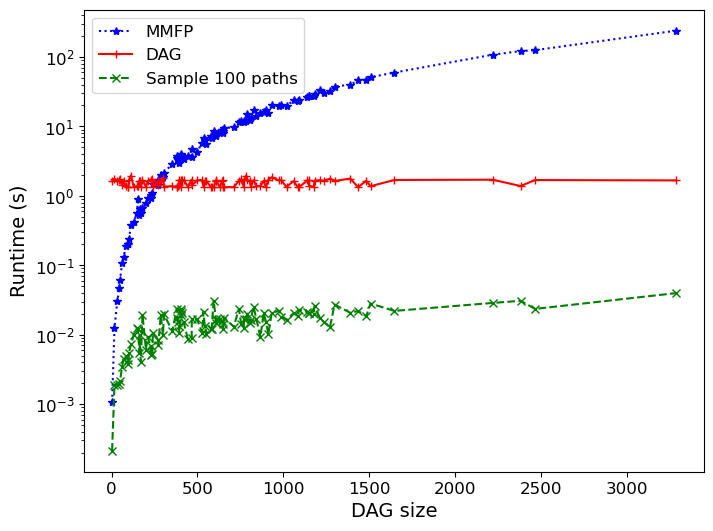

In [205]:
plt.figure(figsize=(8, 6))

# Define styles for each function
styles = {
    'solve_and_compute': ('b:', '*', 'MMFP'),
    'get_dag_wrapper': ('r-', '+', 'DAG'),
    'sample_paths': ('g--', 'x', 'Sample 100 paths')

}

# Loop through each function and plot sorted values
for function, (line_style, marker, label) in styles.items():
    subset = df[df['Function'] == function]
    x, y = subset['DAG nodes'], subset['Execution Time (s)']
    
    # Sort while keeping pairs intact
    sorted_indices = x.argsort()
    plt.semilogy(x.iloc[sorted_indices], y.iloc[sorted_indices], line_style, marker=marker, label=label)

# Labels and legend
plt.xlabel('DAG size', fontsize=14)
plt.ylabel('Runtime (s)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [6]:
def get_times(funct_name):
    # Filter for 'get_dag_wrapper' function
    df_filtered = df_avg[df_avg["Function"] == funct_name].copy()

    # Sort based on the predefined order
    df_filtered = df_filtered.assign(
        Dataset=pd.Categorical(df_filtered["Dataset"], categories=places, ordered=True)
    )

    df_sorted = df_filtered.sort_values("Dataset")

    # Extract execution times in the specified order
    execution_times = df_sorted["Execution Time (s)"].values

    return execution_times


In [7]:
df_avg = pd.read_csv('csv_files/df_time.csv')

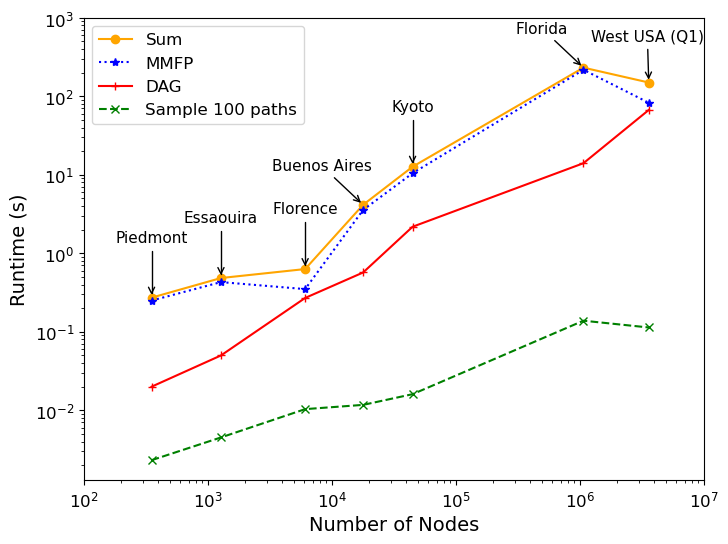

In [8]:
import matplotlib.pyplot as plt

places = ['Piedmont, California, USA','Essaouira, Morocco', 
          'Florence, Italy', 'Buenos Aires, Argentina', 'Kyoto, Japan', 'Florida', 'West USA (Q1)']

# Sample data extracted based on visual observation
x_values_on_the_axis = np.array([10**2, 10**3, 10**4, 10**5, 10**6, 10**7])

# Assuming get_times is defined elsewhere
time_dag = get_times('get_dag_wrapper')
time_sample = get_times('sample_paths')   # 100 paths
time_MMFP = get_times('solve_and_compute')

labels = ['Piedmont', 'Essaouira', 'Florence', 'Buenos Aires', 'Kyoto', 'Florida', 'West USA (Q1)']
x = [352, 1277, 6096, 17890, 44828, 1070376, 3598623]  

# Plot
plt.figure(figsize=(8, 6))
summ = time_dag + time_sample + time_MMFP
plt.loglog(x, summ, 'orange', marker='o', label='Sum')
plt.loglog(x, time_MMFP, 'b:', marker='*', label='MMFP')
plt.loglog(x, time_dag, 'r-', marker='+', label='DAG')
plt.loglog(x, time_sample, 'g--', marker='x', label='Sample 100 paths')

for i, label in enumerate(labels):
    if i == (len(labels) - 2):
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(-30, 25),  # Move text above the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black'))  # Vertical arrows
    elif i == (len(labels) - 4):
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(-30, 25),  # Move text above the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black' )
                                     )  # Vertical arrows
    elif i == (len(labels) - 1):
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(-1, 30),  # Move text above the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black' )
                                     )  # Vertical arrows
    else:
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(0, 40),  # Move text beside the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black', 
                                     connectionstyle="angle,angleA=90,angleB=180"))  # Vertical arrows

# Set custom x-axis ticks
plt.xticks(x_values_on_the_axis, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(None, 10**3)

plt.xlabel('Number of Nodes', fontsize=14)
plt.ylabel('Runtime (s)', fontsize=14)
plt.legend(fontsize=12)
#plt.grid(True, which='both', linestyle='--', linewidth=0.1)
plt.show()


In [9]:
def measure_resources(memo=True):
    """Decorator factory to measure CPU and execution time of a function, with optional memory tracking."""
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            
            if memo == True:
                tracemalloc.start()
            start_time = time.time()

            result = func(*args, **kwargs)  # Execute the function

            end_time = time.time()
            
            #Get peak memory usage
            if memo == True:
                _, peak_memory = tracemalloc.get_traced_memory()
                tracemalloc.stop()
                peak_memory_mb = peak_memory / (1024 * 1024)

            duration = end_time - start_time

            # Determine peak memory
            if memo == True:
                peak_memory = peak_memory_mb
            
            else:
                peak_memory = np.nan  
                
            # Create resource usage data
            resource_usage = {
                "Function": func.__name__,
                "Dataset": place,
                "Peak memory usage (MB)": peak_memory,
                "Execution Time (s)": duration,
                "Timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
            }

            # Save results to a Pandas DataFrame
            csv_filename = "csv/resource_usage_memoryonly.csv"
            df = pd.DataFrame([resource_usage])

            # Append to CSV file (create if not exists)
            if not os.path.exists(csv_filename):
                df.to_csv(csv_filename, index=False)
            else:
                df.to_csv(csv_filename, mode='a', index=False, header=False)

            print(f"Resource Usage for {func.__name__}:")
            print(df)

            return result

        return wrapper
    return decorator  # Return the decorator itself

# Use the decorator without arguments (default behavior: track memory)
@measure_resources()
def get_dag_wrapper(g, orig_node, dest_node, wgt):
    return ut.get_dag(g, orig_node, dest_node, weight=wgt)

@measure_resources()
def sample_paths(dag, orig_node, dest_node, n_paths):
    return ut.sample_k_random_FP(dag, orig_node, dest_node, n_paths)

# Use the decorator with an argument to disable internal memory tracking
@measure_resources(memo=False)
def solve_and_compute(dag, orig_node, dest_node):
    K, alpha, model, result, peak_memory, memory = ut.iterative_solver(dag, orig_node, dest_node, track_memory= True)
    final = ut.compute_probabilities_and_expectations(dag, result, dest_node)
    return K, alpha, model, result, final, peak_memory, memory


In [12]:
def get_memory(funct_name):
    # Filter for 'get_dag_wrapper' function
    df_filtered = df_avg[df_avg["Function"] == funct_name].copy()

    # Sort based on the predefined order
    df_filtered = df_filtered.assign(
        Dataset=pd.Categorical(df_filtered["Dataset"], categories=places, ordered=True)
    )

    df_sorted = df_filtered.sort_values("Dataset")

    # Extract execution times in the specified order
    memory = df_sorted["Peak memory usage (MB)"].values

    return memory

In [13]:
df_avg = pd.read_csv('csv_files/df_mem.csv')

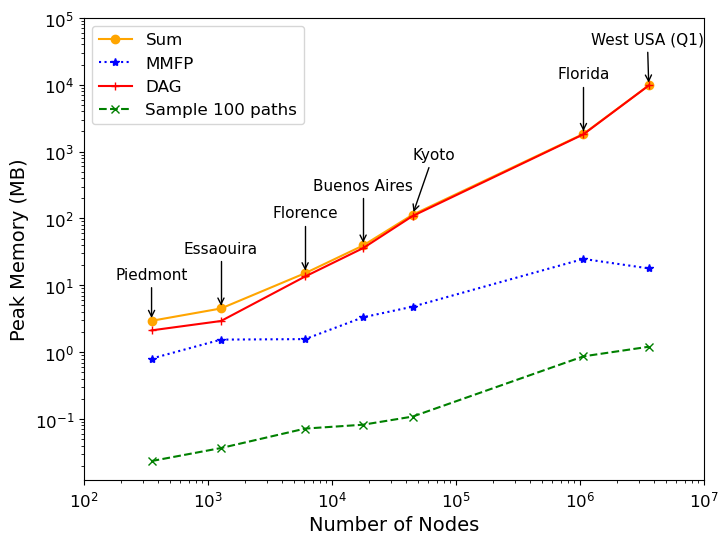

In [15]:
places = ['Piedmont, California, USA','Essaouira, Morocco', 
          'Florence, Italy', 'Buenos Aires, Argentina', 'Kyoto, Japan', 'Florida', 'West USA (Q1)']


# Sample data extracted based on visual observation
x_values_on_the_axis = np.array([10**2, 10**3, 10**4, 10**5,10**6, 10**7])


# Assuming get_times is defined elsewhere
memory_dag = get_memory('get_dag_wrapper')
memory_sample = get_memory('sample_paths')   # 100 paths
memory_MMFP = get_memory('solve_and_compute')

labels = ['Piedmont','Essaouira', 'Florence', 'Buenos Aires', 'Kyoto', 'Florida', 'West USA (Q1)']
x = [352, 1277, 6096, 17890, 44828, 1070376, 3598623]  
 

# Plot
plt.figure(figsize=(8, 6))
summ = memory_dag+memory_sample+memory_MMFP
plt.loglog(x, summ, 'orange', marker='o', label='Sum')
plt.loglog(x, memory_MMFP, 'b:', marker='*', label='MMFP')
plt.loglog(x, memory_dag, 'r-', marker='+', label='DAG')
plt.loglog(x, memory_sample, 'g--', marker='x', label='Sample 100 paths')




for i, label in enumerate(labels):
    if i == 0:
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(0, 30),  # Move text above the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black'))  # Vertical arrows
    elif i == (len(labels) - 3):
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(15, 40),  # Move text above the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black' )
                                     )  # Vertical arrows
    elif i == (len(labels) - 1):
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(-1, 30),  # Move text above the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black' )
                                     )  # Vertical arrows
    else:
        plt.annotate(label, (x[i], summ[i]),
                     textcoords="offset points", xytext=(0, 40),  # Move text beside the point
                     ha='center', fontsize=11,
                     arrowprops=dict(arrowstyle='->', lw=1., color='black', 
                                     connectionstyle="angle,angleA=90,angleB=180"))  # Vertical arrows

# Set custom x-axis ticks
plt.xticks(x_values_on_the_axis, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(None, 10**5)

plt.xlabel('Number of Nodes', fontsize=14)
plt.ylabel('Peak Memory (MB)', fontsize=14)
plt.legend(fontsize=12)
#plt.grid(True, which='both', linestyle='--', linewidth=0.1)
plt.show()